# FitzHugh-Nagumo Systems: Regular vs Mass-Conserved

This notebook complements the group report by numerically simulating both the regular and mass-conserved versions of the FitzHugh-Nagumo (FHN) system. We explore several dynamical regimes predicted by our bifurcation analysis.

---

## Goals:
1. Compare the dynamics of the regular and mass-conserved FHN systems.
2. Simulate different regimes: steady state, limit cycle, Turing pattern, traveling waves.
3. Visualize spatial patterns and local time series.

### Regular FHN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_regular_fhn(T=100, N=256, dt=0.01, dx=1.0, a=0.75, b=0.8, tau=20.0, Du=1.0, Dv=40.0):
    u = np.random.rand(N)
    v = np.random.rand(N)
    
    def laplacian(z):
        return np.roll(z, -1) - 2 * z + np.roll(z, 1)
    
    U, V = [u.copy()], [v.copy()]
    for _ in range(int(T / dt)):
        Lu = Du * laplacian(u) / dx**2
        Lv = Dv * laplacian(v) / dx**2
        f = u - u**3 / 3 - v
        g = u - a + b * v
        u += dt * (f + Lu)
        v += dt * (g / tau + Lv)
        if _ % 100 == 0:
            U.append(u.copy())
            V.append(v.copy())
    return np.array(U), np.array(V)

In [2]:

def plot_simulation(U, V, title="FHN Simulation"):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(U.T, aspect='auto', cmap='plasma', extent=[0, U.shape[0], 0, U.shape[1]])
    plt.title("u(x, t)")
    plt.xlabel("Time")
    plt.ylabel("Space")
    plt.colorbar()
    
    plt.subplot(1, 2, 2)
    plt.imshow(V.T, aspect='auto', cmap='viridis', extent=[0, V.shape[0], 0, V.shape[1]])
    plt.title("v(x, t)")
    plt.xlabel("Time")
    plt.colorbar()
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

This regime is below both the Hopf and saddle-node bifurcations. We expect the system to converge to a homogeneous steady state.

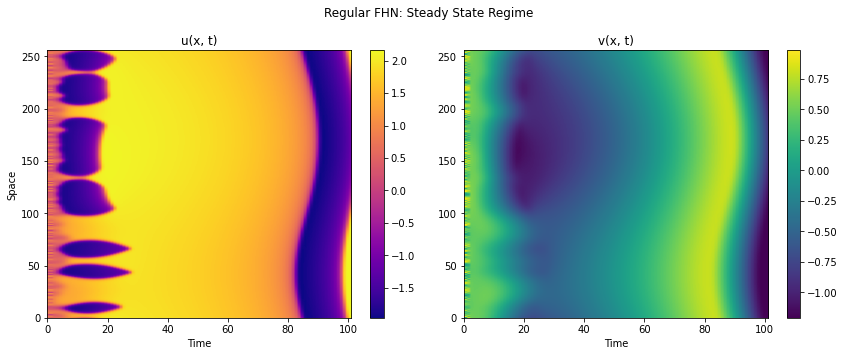

In [14]:
U_ss, V_ss = simulate_regular_fhn(a=1.1, b=0.8)
plot_simulation(U_ss, V_ss, title="Regular FHN: Steady State Regime")